# Exploring the "Our World in Data" dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Download the data from the github repository

In [4]:
url = 'https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv'
df = pd.read_csv(url)

df.head(10)

,iso_code,country,year,co2,consumption_co2,co2_growth_prct,co2_growth_abs,trade_co2,co2_per_capita,consumption_co2_per_capita,share_global_co2,cumulative_co2,share_global_cumulative_co2,co2_per_gdp,consumption_co2_per_gdp,co2_per_unit_energy,coal_co2,cement_co2,flaring_co2,gas_co2,oil_co2,other_industry_co2,cement_co2_per_capita,coal_co2_per_capita,flaring_co2_per_capita,gas_co2_per_capita,oil_co2_per_capita,other_co2_per_capita,trade_co2_share,share_global_cement_co2,share_global_coal_co2,share_global_flaring_co2,share_global_gas_co2,share_global_oil_co2,share_global_other_co2,cumulative_cement_co2,cumulative_coal_co2,cumulative_flaring_co2,cumulative_gas_co2,cumulative_oil_co2,cumulative_other_co2,share_global_cumulative_cement_co2,share_global_cumulative_coal_co2,share_global_cumulative_flaring_co2,share_global_cumulative_gas_co2,share_global_cumulative_oil_co2,share_global_cumulative_other_co2,total_ghg,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
0,AFG,Afghanistan,1949,0.015,NaN,NaN,NaN,NaN,0.002,NaN,0.0,0.015,0.0,NaN,NaN,NaN,0.015,NaN,NaN,NaN,NaN,NaN,NaN,0.002,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.015,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7624058.0,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,1950,0.084,NaN,475.00,0.070,NaN,0.011,NaN,0.0,0.099,0.0,0.009,NaN,NaN,0.021,NaN,NaN,NaN,0.063,NaN,NaN,0.003,NaN,NaN,0.008,NaN,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.036,NaN,NaN,0.063,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7752117.0,9.421400e+09,NaN,NaN,NaN
2,AFG,Afghanistan,1951,0.092,NaN,8.70,0.007,NaN,0.012,NaN,0.0,0.191,0.0,0.010,NaN,NaN,0.026,NaN,NaN,NaN,0.066,NaN,NaN,0.003,NaN,NaN,0.008,NaN,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.061,NaN,NaN,0.129,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7840151.0,9.692280e+09,NaN,NaN,NaN
3,AFG,Afghanistan,1952,0.092,NaN,0.00,0.000,NaN,0.012,NaN,0.0,0.282,0.0,0.009,NaN,NaN,0.032,NaN,NaN,NaN,0.060,NaN,NaN,0.004,NaN,NaN,0.008,NaN,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.093,NaN,NaN,0.189,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7935996.0,1.001732e+10,NaN,NaN,NaN
4,AFG,Afghanistan,1953,0.106,NaN,16.00,0.015,NaN,0.013,NaN,0.0,0.388,0.0,0.010,NaN,NaN,0.038,NaN,NaN,NaN,0.068,NaN,NaN,0.005,NaN,NaN,0.008,NaN,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.131,NaN,NaN,0.257,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8039684.0,1.063052e+10,NaN,NaN,NaN
5,AFG,Afghanistan,1954,0.106,NaN,0.00,0.000,NaN,0.013,NaN,0.0,0.495,0.0,0.010,NaN,NaN,0.043,NaN,NaN,NaN,0.064,NaN,NaN,0.005,NaN,NaN,0.008,NaN,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.174,NaN,NaN,0.321,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8151316.0,1.086636e+10,NaN,NaN,NaN
6,AFG,Afghanistan,1955,0.154,NaN,44.83,0.048,NaN,0.019,NaN,0.0,0.649,0.0,0.014,NaN,NaN,0.062,NaN,NaN,NaN,0.092,NaN,NaN,0.008,NaN,NaN,0.011,NaN,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.236,NaN,NaN,0.413,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8270992.0,1.107819e+10,NaN,NaN,NaN
7,AFG,Afghanistan,1956,0.183,NaN,19.05,0.029,NaN,0.022,NaN,0.0,0.832,0.0,0.016,NaN,NaN,0.062,NaN,NaN,NaN,0.121,NaN,NaN,0.007,NaN,NaN,0.014,NaN,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.298,NaN,NaN,0.534,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8398873.0,1.158124e+10,NaN,NaN,NaN
8,AFG,Afghanistan,1957,0.293,NaN,60.00,0.110,NaN,0.034,NaN,0.0,1.125,0.0,0.025,NaN,NaN,0.077,NaN,NaN,NaN,0.216,NaN,NaN,0.009,NaN,NaN,0.025,NaN,NaN,NaN,0.0,NaN,NaN,0.01,NaN,NaN,0.375,NaN,NaN,0.750,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8535157.0,1.157897e+10,NaN,NaN,NaN
9,AFG,Afghanistan,1958,0.330,NaN,12.50,0.037,NaN,0.038,NaN,0.0,1.455,0.0,0.027,NaN,NaN,0.092,NaN,NaN,NaN,0.238,NaN,NaN,0.011,NaN,NaN,0.027,NaN,NaN,NaN,0.0,NaN,NaN,0.01,NaN,NaN,0.467,NaN,NaN,0.988,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8680097.0,1.223884e+10,NaN,NaN,NaN


Some basic info about the dataset

In [ ]:
print("Number of rows:", len(df))
print("Number of columns:", len(df.columns))
# print("Column names:")
# for col in df.columns:
#   print(col)

Number of rows: 24651
Number of columns: 58


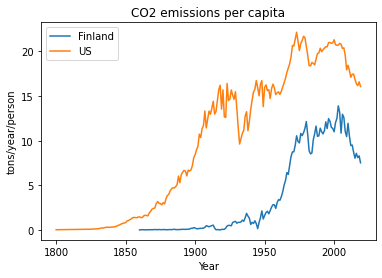

In [ ]:
df_fin = df[df.country == "Finland"]
plt.plot(df_fin.year, df_fin.co2_per_capita, label = "Finland")

#for i in df.country.drop_duplicates():print(i)
df_us = df[df.country == "United States"]
plt.plot(df_us.year, df_us.co2_per_capita, label = "US")
plt.ylabel("tons/year/person")
plt.xlabel("Year")
plt.title("CO2 emissions per capita")
plt.legend()


Let's take a look at all countries

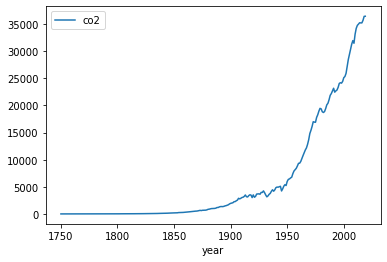

In [ ]:
df[df["country"] == "World"].plot(x = "year", y = "co2")

CO2 per capita for eachcountry


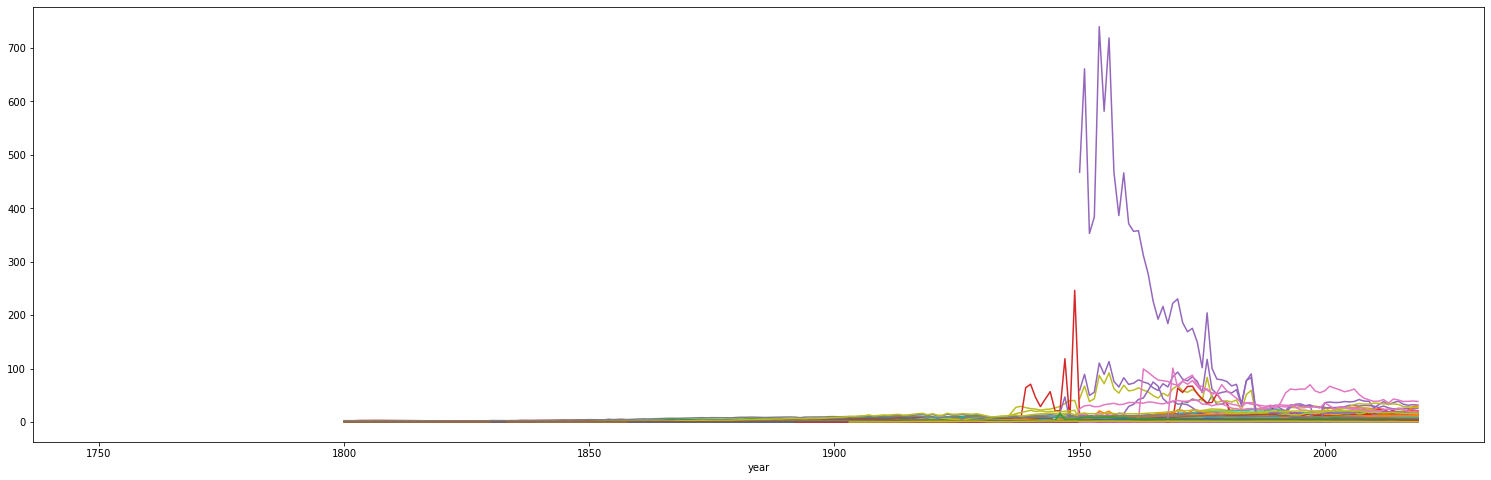

In [ ]:
plt.figure(figsize = (26, 8))
dfy = df.set_index("year")
dfy.groupby("country")["co2_per_capita"].plot()
print("CO2 per capita for each country")

There seem to be some outliers. Perhaps oil exporters such as Quatar?

CO2 for each country


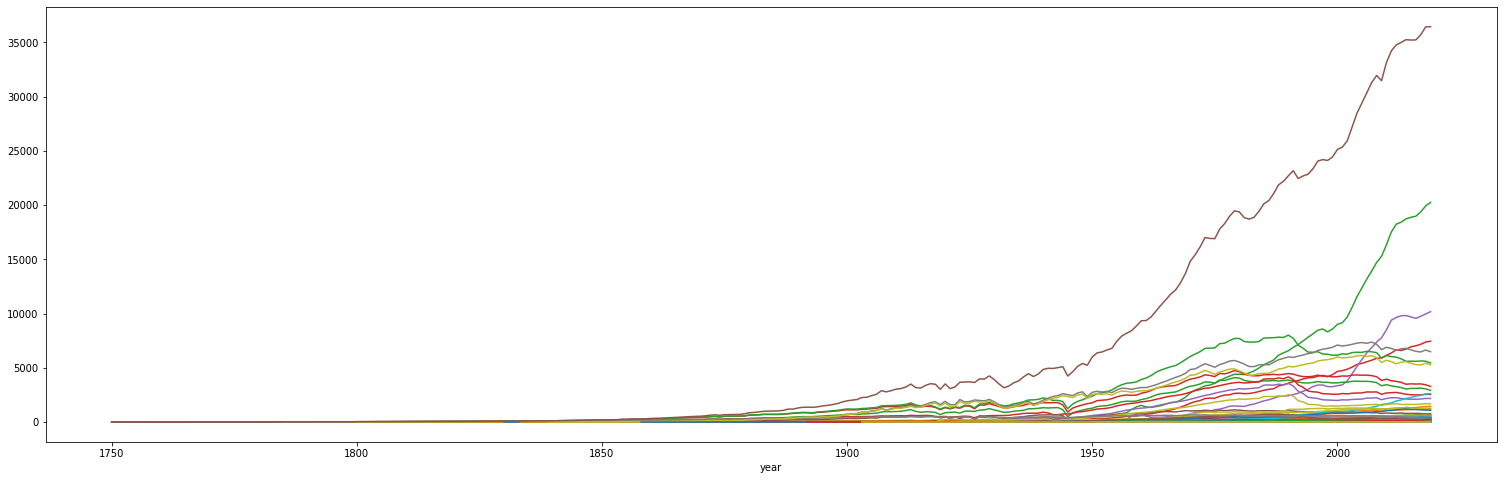

In [ ]:
plt.figure(figsize = (26, 8))
dfy.groupby("country")["co2"].plot()
print("CO2 for each country")

Looks like there are some bigh countries (or continents) which keep emitting more and more.

In [ ]:
df[["country", "co2", "co2_per_capita", "co2_growth_prct", "year"]][df.year == 2018].sort_values("co2", ascending=False).head(20)

,country,co2,co2_per_capita,co2_growth_prct,year
24392,World,36419.712,4.772,2.03,2018
1229,Asia,19917.214,4.368,2.80,2018
4677,China,9956.569,6.974,2.11,2018
1419,Asia (excl. China & India),7369.322,4.142,2.83,2018
16036,North America,6639.555,11.469,2.76,2018
7698,Europe,5601.973,7.497,-0.46,2018
23523,United States,5424.882,16.585,3.26,2018
6656,EU-28,3434.629,6.712,-2.30,2018
6386,EU-27,3054.491,6.871,-2.33,2018
10734,India,2591.324,1.916,5.47,2018


In [ ]:
df[["country", "co2", "co2_per_capita", "co2_growth_prct", "year"]][df.year == 2018].sort_values("co2_per_capita", ascending=False).head(20)

,country,co2,co2_per_capita,co2_growth_prct,year
18169,Qatar,109.245,39.273,3.48,2018
5439,Curacao,5.269,32.377,3.46,2018
15365,New Caledonia,8.209,29.320,53.59,2018
22203,Trinidad and Tobago,37.866,27.244,-5.26,2018
12259,Kuwait,104.218,25.190,-0.54,2018
3598,Brunei,9.560,22.287,0.09,2018
14495,Mongolia,64.508,20.348,88.87,2018
2139,Bahrain,31.594,20.131,-3.59,2018
23033,United Arab Emirates,188.541,19.577,1.03,2018
19671,Sint Maarten (Dutch part),0.773,18.444,2.97,2018


Let's focus on just a few countries that might be interesting to a nordic audience.

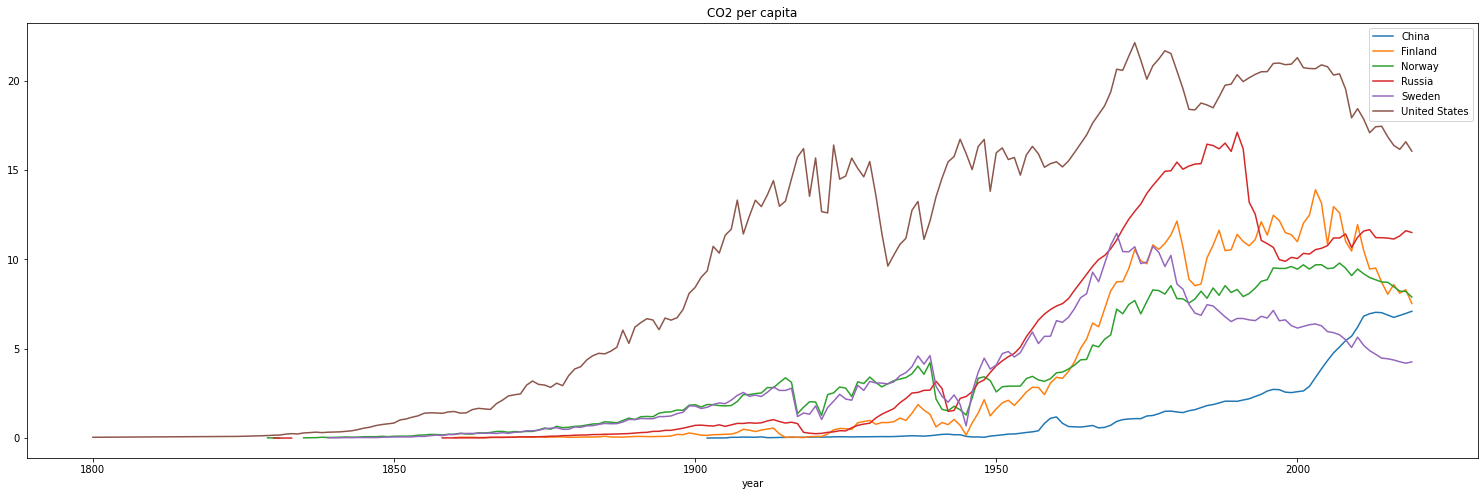

In [ ]:
countries_of_interest = ["Finland", "Norway", "Sweden", "United States", "Russia", "China"]
places_of_interest = countries_of_interest + ["World", "Europe", "Asia", "Africa"]

df_of_interest = df[df["country"].isin(countries_of_interest)]

plt.figure(figsize = (26, 8))
dfy_of_interest = df_of_interest.set_index("year")
dfy_of_interest.groupby("country")["co2_per_capita"].plot(legend = True, title = "CO2 per capita")
print("")

Below is an attempt at an interactive visualization which allows the user to find a country they are intrested in and to see it's $CO_2$ emissions.  
I followed this tutorial: https://towardsdatascience.com/using-python-to-create-a-world-map-from-a-list-of-country-names-cd7480d03b10

In [ ]:
# !pip install pycountry_convert

In [ ]:
#function to get longitude and latitude data from country code

from geopy.geocoders import Nominatim

geolocator = Nominatim()

def geolocate(country):
    try:
        # Geolocate the center of the country
        loc = geolocator.geocode(country)
        # And return latitude and longitude
        return (loc.latitude, loc.longitude)
    except:
        # Return missing value
        return (np.nan, np.nan)


df_map = df[["year", "country", "co2", "co2_per_capita", "co2_growth_prct", "methane"]]
df_map = df_map[df_map.year == 2019]

df_map["geolocation"] = df_map["country"].map(lambda x: geolocate(x))

In [ ]:
# Create a world map to show distributions of users 
import folium
from folium.plugins import MarkerCluster

#empty map
world_map= folium.Map(tiles="cartodbpositron")
marker_cluster = MarkerCluster().add_to(world_map)

#for each coordinate, create circlemarker of desired value
for i in range(len(df_map)):
        lat, long = df_map.iloc[i]['geolocation']
        radius=5
        popup_text = """Country : {}<br>
                    CO2 emissions : {}<br>"""
        popup_text = popup_text.format(df_map.iloc[i]['country'],
                                   df_map.iloc[i]['co2']
                                   )
        if(not np.isnan(lat)):
          folium.CircleMarker(location = [lat, long], radius=radius, popup= popup_text, fill =True).add_to(marker_cluster)

#show the map
world_map

## More overarching stuff

In [ ]:
import seaborn as sns

In [ ]:
df.columns

Index(['iso_code', 'country', 'year', 'co2', 'consumption_co2',
       'co2_growth_prct', 'co2_growth_abs', 'trade_co2', 'co2_per_capita',
       'consumption_co2_per_capita', 'share_global_co2', 'cumulative_co2',
       'share_global_cumulative_co2', 'co2_per_gdp', 'consumption_co2_per_gdp',
       'co2_per_unit_energy', 'coal_co2', 'cement_co2', 'flaring_co2',
       'gas_co2', 'oil_co2', 'other_industry_co2', 'cement_co2_per_capita',
       'coal_co2_per_capita', 'flaring_co2_per_capita', 'gas_co2_per_capita',
       'oil_co2_per_capita', 'other_co2_per_capita', 'trade_co2_share',
       'share_global_cement_co2', 'share_global_coal_co2',
       'share_global_flaring_co2', 'share_global_gas_co2',
       'share_global_oil_co2', 'share_global_other_co2',
       'cumulative_cement_co2', 'cumulative_coal_co2',
       'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_oil_co2',
       'cumulative_other_co2', 'share_global_cumulative_cement_co2',
       'share_global_cumulative_c

In [ ]:
df['co2'].describe()

count    23403.000000
mean       267.675691
std       1502.695270
min          0.000000
25%          0.539000
50%          5.089000
75%         43.946500
max      36441.388000
Name: co2, dtype: float64

Correlation matrix for all variables

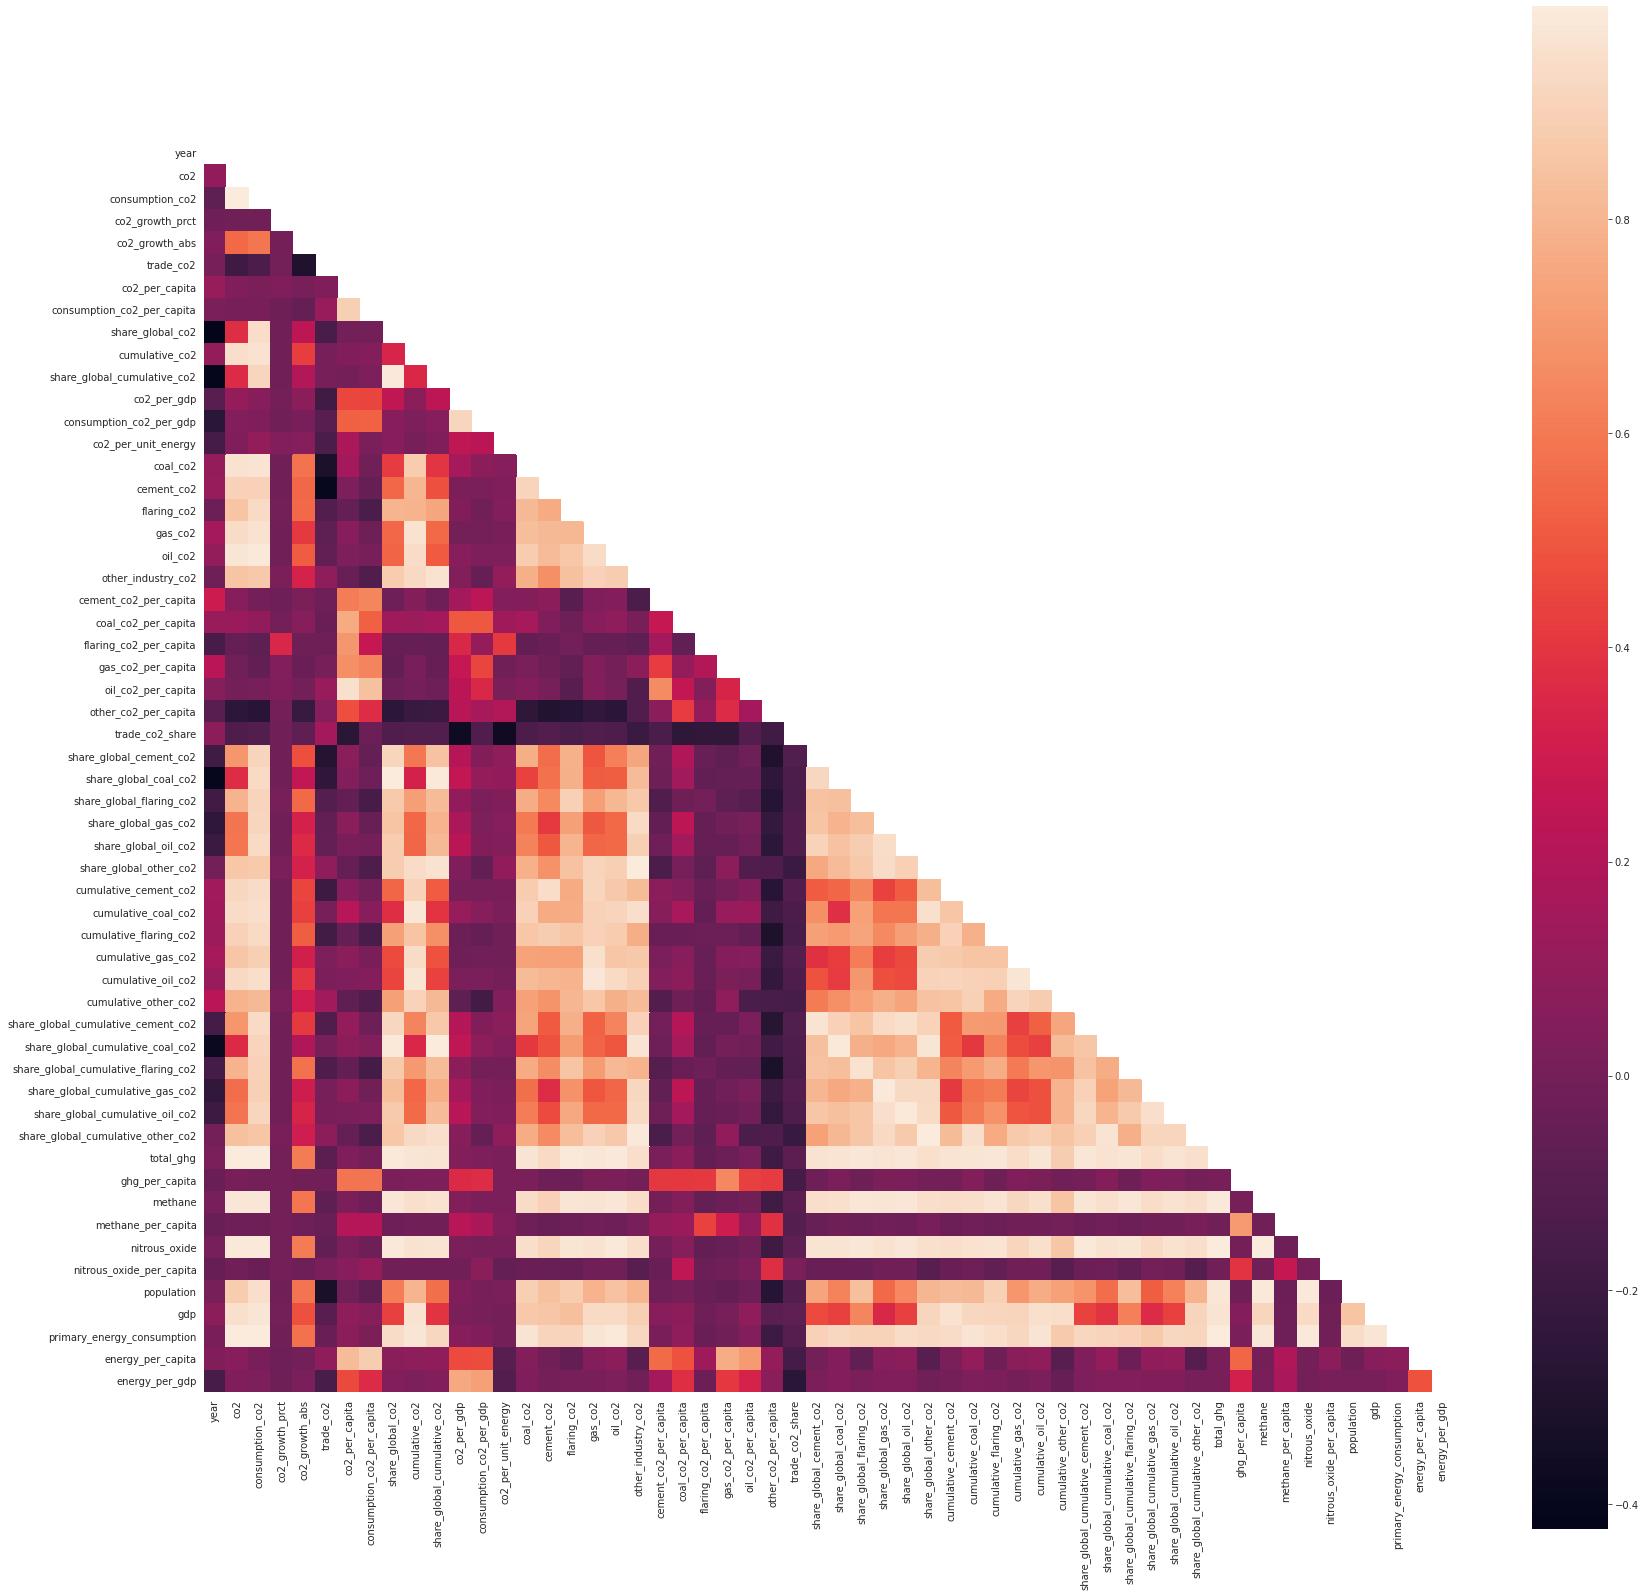

In [ ]:
corr = df.corr()
corr = pd.DataFrame(corr)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(28, 28))
    sns.heatmap(corr, mask=mask, square=True);

Highly positively correlated (>- 0.9) variables



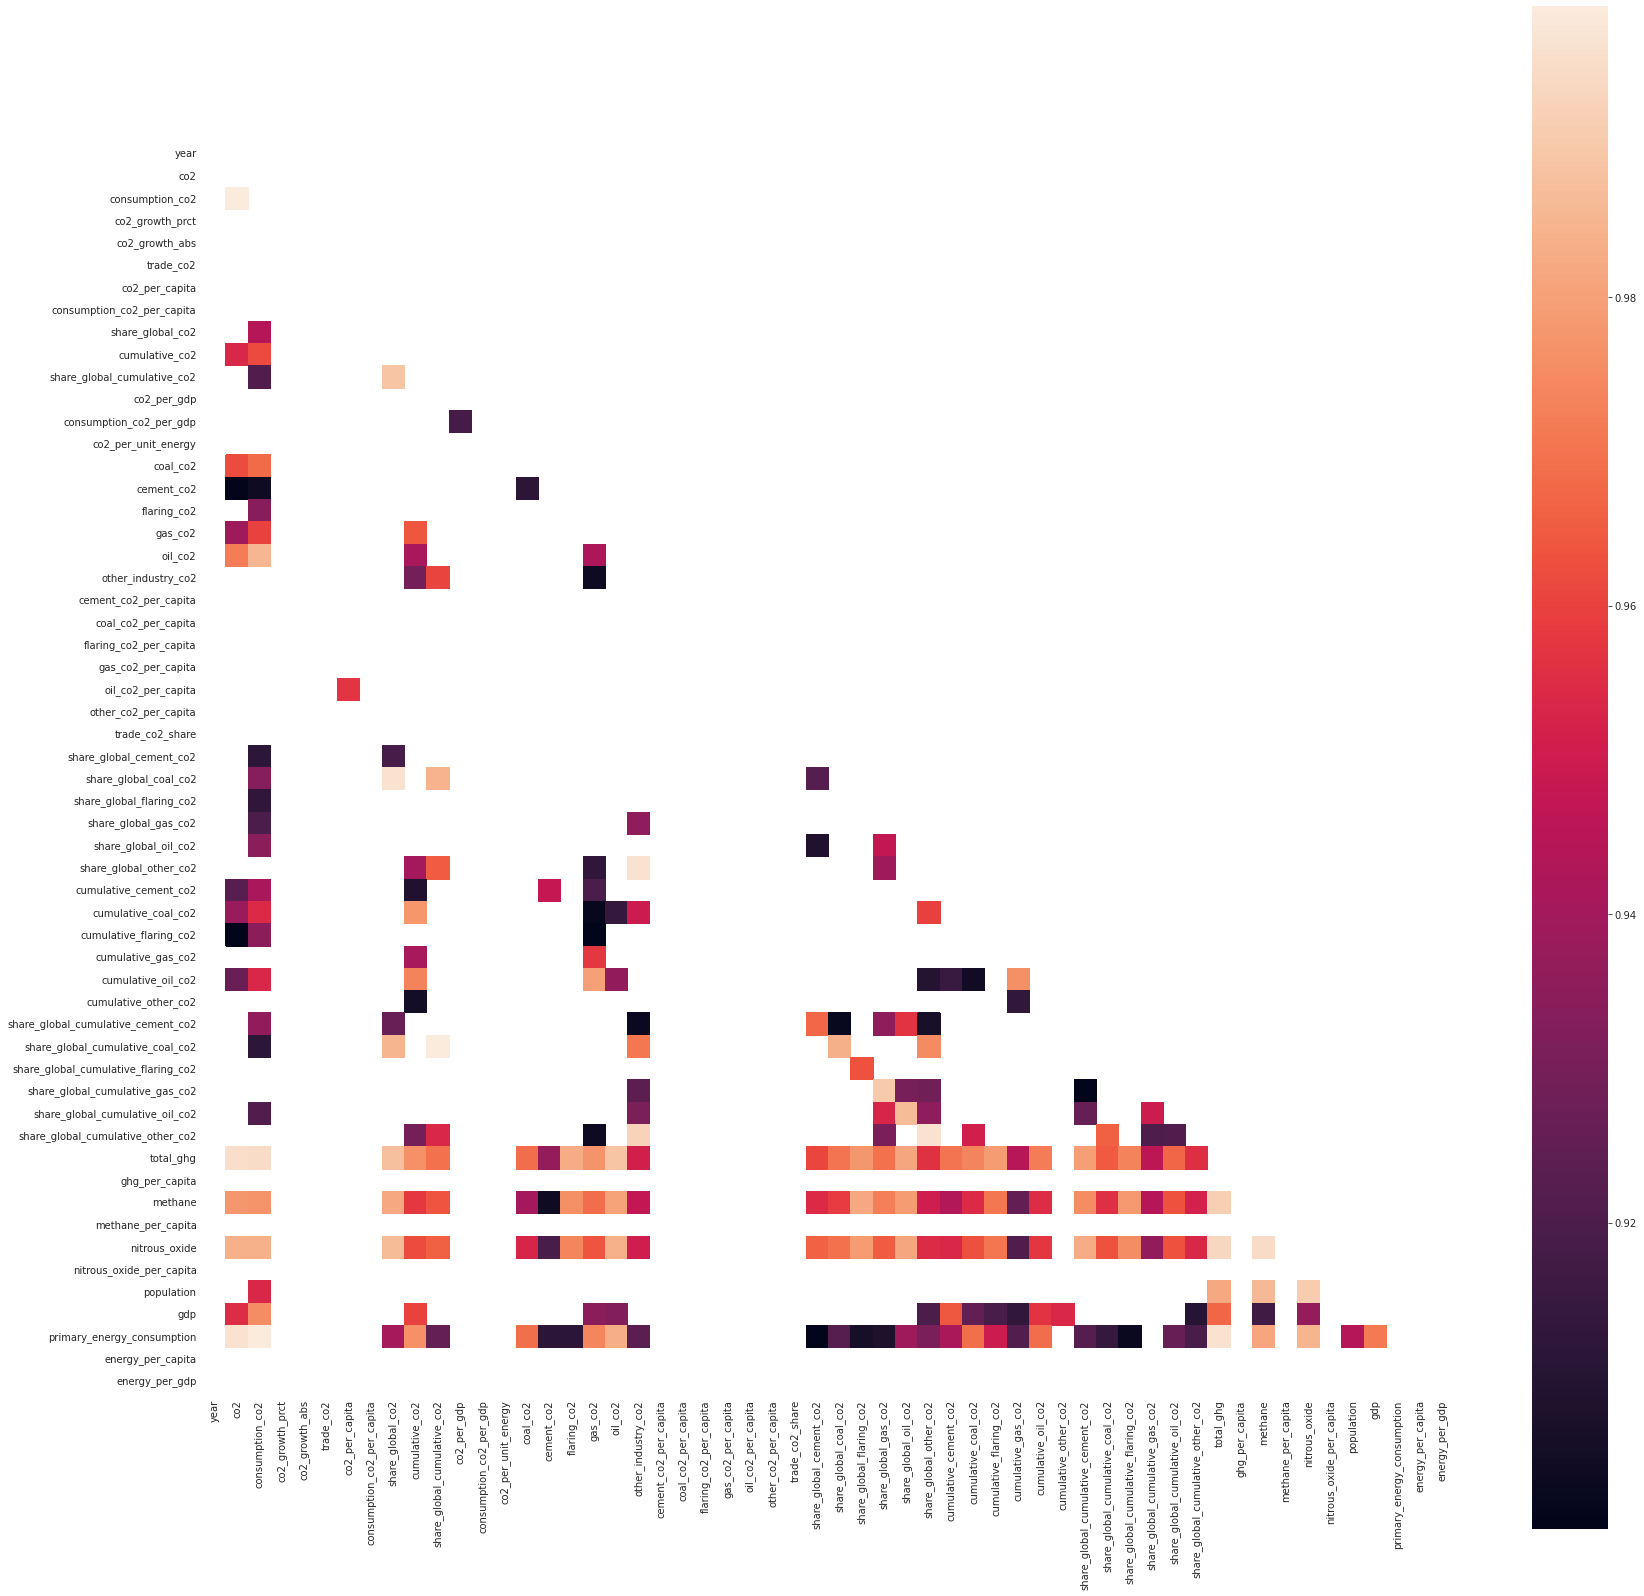

In [ ]:
pos = corr[corr >= .9]
mask = np.zeros_like(pos)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(28, 28))
    sns.heatmap(pos, mask=mask, square=True);

Decently negatively correlated (<= -0.3) variables


In [ ]:
rows, cols = corr.shape
flds = list(corr.columns)
c = corr.values

for i in range(cols):
    for j in range(i+1, cols):
        if c[i,j] <= -0.3:
            print(flds[i], ' ', flds[j], ' ', c[i,j])

year   share_global_co2   -0.4230283199046846
year   share_global_cumulative_co2   -0.40908760932238686
year   share_global_coal_co2   -0.40473228379688625
year   share_global_cumulative_coal_co2   -0.3882925495371596
co2_growth_abs   trade_co2   -0.3056813826116416
trade_co2   coal_co2   -0.31923875300096244
trade_co2   cement_co2   -0.3982282553965037
trade_co2   population   -0.3231199631622169
co2_per_gdp   trade_co2_share   -0.3675584057514485
co2_per_unit_energy   trade_co2_share   -0.36651881394036373
other_co2_per_capita   share_global_cement_co2   -0.3042846706541915
other_co2_per_capita   cumulative_flaring_co2   -0.3162094388335237
other_co2_per_capita   share_global_cumulative_flaring_co2   -0.3212721798045217


Top 5 co2 emission outliers wrt mean, median, std, kurt, and skew




In [ ]:
continents = ["Asia", "EU-27", "EU-28", "Europe", "North America", 'Asia (excl. China & India)', "International transport", "Europe (excl. EU-27)", "Europe (excl. EU-28)", "Kuwaiti Oil Fires", "World"]
df_country = df[~df["country"].isin(continents)]
df_country['co2']=df_country['co2'].fillna(0)

d = {}
# Group dataframe by country and find countries with highest CO2 emissions
for country, df_country_single in df_country.groupby("country"):
    d[country] = {
        "mean": df_country_single["co2"].mean(),
        "median": df_country_single["co2"].median(),
        "std": df_country_single["co2"].std(),
        "skew": df_country_single["co2"].skew(),
        "kurt": df_country_single["co2"].kurt(),
    }

def print_top_5(d, key):
    print("\n\nTop 5 countries with highest {} Co2 emissions".format(key))
    top_5 = sorted(d.items(), key=lambda x: x[1][key], reverse=True)[:5]
    # return top_5

    for country, value in top_5:
        print(country, value[key])

print_top_5(d, "mean")
print_top_5(d, "median")
print_top_5(d, "std")
print_top_5(d, "skew")
print_top_5(d, "kurt")



Top 5 countries with highest mean Co2 emissions
United States 1864.7194
China 1818.064991735537
Russia 599.3918315789473
Japan 424.9007434210527
Germany 403.41807894736826


Top 5 countries with highest median Co2 emissions
United States 1231.4285
China 435.51800000000003
Germany 329.34400000000005
United Kingdom 315.128
South America 135.954


Top 5 countries with highest std Co2 emissions
China 2875.928006675505
United States 2065.2925126344862
Russia 788.2469417231556
India 587.8194048562051
Japan 494.7369731569459


Top 5 countries with highest skew Co2 emissions
Puerto Rico 10.000000000000014
Ryukyu Islands 6.5445550015807035
Laos 4.0905150483826604
Leeward Islands 3.0040241615840606
Mongolia 2.854122805843031


Top 5 countries with highest kurt Co2 emissions
Puerto Rico 100.0000000000001
Ryukyu Islands 46.997008541734196
Laos 17.149581773529768
Mongolia 9.081488240696014
Leeward Islands 7.778970910973274


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Could possibly do this process (outliers -> viz) for more variables (per_capita, coal, etc, etc)

## Test out linear regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
fi = df[df.country == "Finland"]
fi = fi[df.year > 1980]
fi = fi[df.year < 2019]
fi = fi[["country", "year", "co2", "co2_growth_prct", "population", "gdp", "energy_per_capita"]]
fi["gdp_per_capita"] = fi["gdp"] / fi["population"]
fi

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,country,year,co2,co2_growth_prct,population,gdp,energy_per_capita,gdp_per_capita
8422,Finland,1981,51.404,-11.59,4809807.0,1.004872e+11,54867.679,20892.157698
8423,Finland,1982,42.977,-16.39,4835102.0,1.037549e+11,53888.911,21458.683774
8424,Finland,1983,41.464,-3.52,4862171.0,1.065554e+11,53040.244,21915.187666
8425,Finland,1984,42.147,1.65,4888197.0,1.097719e+11,55001.424,22456.518215
8426,Finland,1985,49.549,17.56,4911220.0,1.134665e+11,57503.625,23103.520690
8427,Finland,1986,53.215,7.40,4930342.0,1.161536e+11,57946.186,23558.928510
8428,Finland,1987,57.534,8.12,4946368.0,1.209211e+11,60788.971,24446.434910
8429,Finland,1988,52.058,-9.52,4961097.0,1.268515e+11,60220.555,25569.235323
8430,Finland,1989,52.448,0.75,4977118.0,1.340455e+11,60306.652,26932.344439
8431,Finland,1990,56.972,8.62,4996220.0,1.340552e+11,64003.814,26831.326684


In [ ]:
predict_from = 2005
training = fi[fi.year < predict_from]
test = fi[fi.year >= predict_from]
y = training.co2
X = training[["population", "gdp_per_capita", "energy_per_capita"]]

reg = LinearRegression().fit(X, y)

print(reg.coef_)
print(reg.intercept_)

prediction = reg.predict(test[["population", "gdp_per_capita", "energy_per_capita"]])
real = test.co2

result = pd.DataFrame({"year": test.year, "prediction": prediction, "real":real})
result


[-2.51897682e-05 -1.27552544e-04  1.73679452e-03]
76.01613836710128


,year,prediction,real
8446,2005,56.175223,57.043
8447,2006,63.403068,68.384
8448,2007,61.839413,66.760
8449,2008,56.404867,58.610
8450,2009,47.187726,55.924
8451,2010,55.600171,64.099
8452,2011,46.123965,56.666
8453,2012,41.562818,51.222
8454,2013,41.219657,51.751
8455,2014,36.356027,47.644


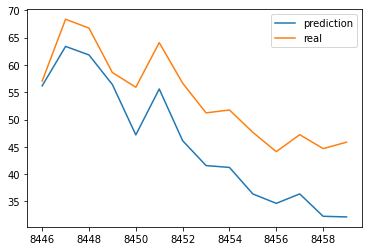

In [ ]:
result[["prediction", "real"]].plot()

## Visualizing how the situation is currently changing in different countries.

### Volcano plot or something like that

In [110]:
df_volcano = df[["country", "year", "population", "gdp", "co2", "co2_growth_prct"]]
df_volcano["gdp_per_capita"] = df_volcano["gdp"] / df_volcano["population"]
df_volcano = df_volcano[df_volcano.year == 2018]

# The non-countries that I have found in the data
not_countries = ["Africa", "Antarctica", "Asia (excl. China & India)", "Asia", "EU-27", "EU-28", "Europe (excl. EU-27)", "Europe (excl. EU-28)", "International transport",
                 "North America (excl. USA)", "North America", "Oceania", "South America", "World"]

df_volcano = df_volcano[~df_volcano.country.isin(not_countries)]

df_volcano.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,country,year,population,gdp,co2,co2_growth_prct,gdp_per_capita
69,Afghanistan,2018,37171922.0,6.759497e+10,10.453,52.38,1818.441643
292,Albania,2018,2882735.0,3.400911e+10,5.403,-0.03,11797.516263
396,Algeria,2018,42228415.0,5.903175e+11,164.309,7.08,13979.154780
426,Andorra,2018,77008.0,NaN,0.464,-0.24,NaN
496,Angola,2018,30809787.0,1.759296e+11,37.679,0.55,5710.184820


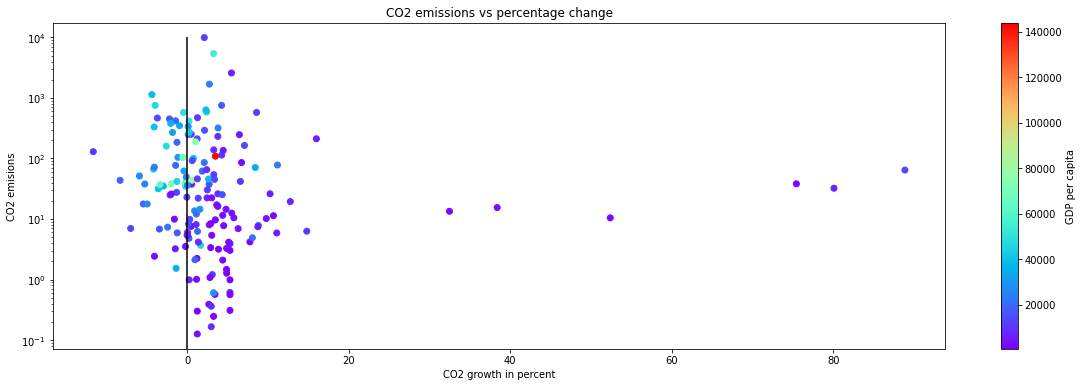

In [111]:
import matplotlib.cm as cm


color_values = df_volcano.gdp_per_capita

plt.figure(figsize = (20, 6))
points = plt.scatter(x = df_volcano.co2_growth_prct, y = df_volcano.co2, c = color_values, cmap="rainbow")
plt.yscale("log")
plt.xlabel("CO2 growth in percent")
plt.ylabel("CO2 emisions")
plt.title("CO2 emissions vs percentage change")
#plt.xlim([-20, 20])
plt.vlines(0, 0, 1*10**4)
plt.colorbar(points).set_label("GDP per capita")

# Ideas for interactive point annotations: https://stackoverflow.com/questions/7908636/how-to-add-hovering-annotations-in-matplotlib